# Titanic ship wreck survival prediction; Logistic Regression

#### >>Iteration1 (19/04/2022) 

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Load data

In [3]:
df = pd.read_csv('train.csv')

### Explore Data

In [4]:
#first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#dimension of data; displayed as (#rows, #columns)
df.shape

(891, 12)

In [6]:
#columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#statiscal tendencies
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Train data preprocessing

In [9]:
train_data = df
print('percentage of null values in columns')
null_columns=train_data.columns[train_data.isna().sum()>0]
train_data[null_columns].isna().sum()/train_data[null_columns].shape[0]*100

percentage of null values in columns


Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

Embarked has .2% null values, which can be imputed with most frequent port.

Age has 19% null values, which has to be imputed.

Cabin has 77% null values, which is on a higher side, and imputing with other values may be beyond fair assumptions.

### Handling missing train data

In [10]:
#column 'Embarked' can be replaced with most frequent port
most_embarked = train_data.value_counts('Embarked').idxmax()
#hence, replacing missing values with port 'S'
train_data.Embarked.fillna(most_embarked, inplace=True)

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

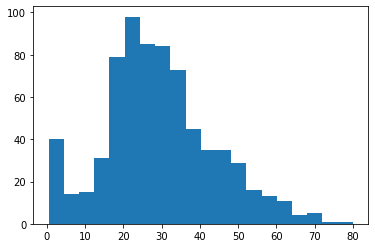

In [11]:
#finding data skew for column 'Age'
plt.hist(train_data.Age, bins=20)
#data is right skewed, hence imputing missing value with median of 'Age' is preffered, if average, age will be on higher side than actual ages

In [12]:
#imputing 'Age' with median
median_age = train_data.Age.median()
train_data.fillna(median_age, inplace=True)

In [13]:
#'Cabin' has 77% null values, beyond fair imputation, hence dropping the column
train_data = train_data.drop(columns='Cabin')

In [14]:
#reviewing data
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


Further, all string valued columns has to be changed into categorical values(given they are correlated and has atleast some values same)
column 'Name' has to be dropped since these are unique strings cannot help in regression, 
as is 'Ticket', there cannot be any meaningful correlation between them.
All the other string values columns 'Sex', 'Embarked' has to be changed into categorical values, which will represent them in integers and help in regression

In [15]:
#drop 'Name', 'Ticket'
train_data = train_data.drop(columns=['Name','Ticket'])

In [16]:
train_data = pd.get_dummies(train_data, columns=['Sex','Embarked'])

In [17]:
train_data.head()
train_data.shape

(891, 12)

### Test data preprocessing

In [18]:
#train_data is ready for logistic regression.
#same changes has to be done on test_data also
df_test = pd.read_csv('test.csv')
test_data = df_test

In [19]:
print('percentage of null values in test_data columns')
null_columns=test_data.columns[test_data.isna().sum()>0]
test_data[null_columns].isna().sum()/test_data[null_columns].shape[0]*100

percentage of null values in test_data columns


Age      20.574163
Fare      0.239234
Cabin    78.229665
dtype: float64

Fare has .2% null values, which can be imputed with most frequent fare.

Age has 20% null values, which has to be imputed with median or mean.

Cabin has 78% null values, which is on a higher side, and imputing with other values may be beyond fair assumptions, hence will drop it.

### Handling missing train data

In [20]:
#column 'Fare' can be replaced with most frequent fare
frequent_fare = test_data.value_counts('Fare').idxmax()
#hence, replacing missing values with fare 7.75
test_data.Fare.fillna(frequent_fare, inplace=True)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

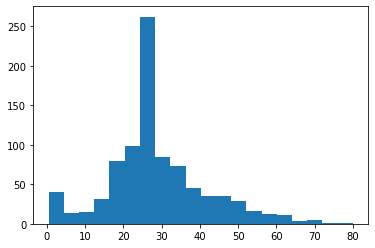

In [21]:
#finding data skew for column 'Age'
plt.hist(train_data.Age, bins=20)
#data is right skewed, hence imputing missing value with median of 'Age' is preffered, 
#if average, age will be on higher side than actual age


In [22]:
#imputing 'Age' with median
median_age = test_data.Age.median()
test_data.fillna(median_age, inplace=True)

In [23]:
#'Cabin' has 78% null values, beyond fair imputation, hence dropping the column
test_data = test_data.drop(columns='Cabin')

In [24]:
#reviewing data
test_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [25]:
#drop 'Name', 'Ticket'
test_data = test_data.drop(columns=['Name','Ticket'])
test_data = pd.get_dummies(test_data, columns=['Sex','Embarked'])


In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [27]:
### extracting required columns
train_data.head()
X_train = train_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]
#set index to 'PassengerId'
X_train = X_train.set_index('PassengerId')
y_train = train_data['Survived']
X_test = test_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]
X_test = X_test.set_index('PassengerId')

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#fit the model
lr.fit(X_train, y_train)
#this is a crude way to achieve objective, 
#to scale better use preprocessing techniques @https://scikit-learn.org/stable/modules/preprocessing.html

/opt/conda/envs/rapids/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [29]:
y_pred = lr.predict(X_test)

In [30]:
submission_data = pd.DataFrame(y_pred, X_test.index)
submission_data.reset_index()
submission_data = submission_data.rename(columns={0:"Survived"})
submission_data.to_csv('submission_data.csv')

### Conclusion
This is a kaggle competition inspired project and all the data sets are taken from [kaggle](https://www.kaggle.com/competitions/titanic/overview).

This code acheived an accuracy of 76.315% on the test set (ranks @11638/14540 as of 21/04/2022)

## Reference


This project is inspired from 
1. [Kaggle ML competition: Titanic - Machine Learning from Disaster Project --> All the datasets are also obtained from this project](https://www.kaggle.com/competitions/titanic/overview)
2. [Machine Learning from Disaster Project; Analysis @BALIGH MNASSRI](https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python/notebook)

ML References:

1.[Machine Learning by Andrew Ng; Coursera](https://www.coursera.org/learn/machine-learning)

#### >>Iteration2 (22/04/2022)

aim:  
    increase accuracy

initial thoughts
1. to scale better and establish level playing field for contribution of all features, include preprocessing steps Ref@https://scikit-learn.org/stable/modules/preprocessing.html
2. need more features to capture relations Ref@https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features
3. column 'Pclass' represent ticket class in 1,2,3. It may be a fair assumption that higher the class better the chance of survival
however if this column is represented as such it may fail to capture this strong assumption because change of a class from 1 to 2 is a unit change in terms of model
but its a huge change in terms of class, hence will represent it catergorically.

#### Apply feature scaling

In [31]:
#import packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [32]:
#define pipeline
#max_iter=500 because lbfgs(default solver for LogisticRegression()) Fails to converge at this amount of data
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))
pipeline.fit(X_train, y_train)
y_pred_iter2 = pipeline.predict(X_test)

In [33]:
submission_data_iter2 = pd.DataFrame(y_pred_iter2, X_test.index)
submission_data_iter2.reset_index()
submission_data_iter2 = submission_data_iter2.rename(columns={0:"Survived"})
submission_data_iter2.to_csv('submission_data_iter2.csv')

update: now model has increased accuracy of 76.555%

#### make column 'Pclass' categorical

In [34]:
#make column 'Pclass' categorical
X_train = pd.get_dummies(X_train, columns=['Pclass'])
X_test = pd.get_dummies(X_test, columns=['Pclass'])

In [35]:
#predict
pipeline.fit(X_train, y_train)
y_pred_iter2 = pipeline.predict(X_test)
submission_data_iter2 = pd.DataFrame(y_pred_iter2, X_test.index)
submission_data_iter2.reset_index()
submission_data_iter2 = submission_data_iter2.rename(columns={0:"Survived"})
submission_data_iter2.to_csv('submission_data_iter2.csv')

#### Add more features

update: model now has the previous accuracy of 76.555%

In [36]:
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(3)
X_train_poly = polynomialFeatures.fit_transform(X_train)
X_test_poly = polynomialFeatures.fit_transform(X_test)

In [37]:
#predict
pipeline.fit(X_train_poly, y_train)
y_pred_iter2 = pipeline.predict(X_test_poly)
submission_data_iter2 = pd.DataFrame(y_pred_iter2, X_test.index)
submission_data_iter2.reset_index()
submission_data_iter2 = submission_data_iter2.rename(columns={0:"Survived"})
submission_data_iter2.to_csv('submission_data_iter2.csv')

update: model now has accuracy 78.468% (ranks @2036/14540 as of 22/04/2022)

##### intuition: try PolynomialFeatures(2), PolynomialFeatures(6)

In [38]:
polynomialFeatures = PolynomialFeatures(2)
X_train_poly = polynomialFeatures.fit_transform(X_train)
X_test_poly = polynomialFeatures.fit_transform(X_test)
#predict
pipeline.fit(X_train_poly, y_train)
y_pred_iter2 = pipeline.predict(X_test_poly)
submission_data_iter2 = pd.DataFrame(y_pred_iter2, X_test.index)
submission_data_iter2.reset_index()
submission_data_iter2 = submission_data_iter2.rename(columns={0:"Survived"})
submission_data_iter2.to_csv('submission_data_iter2.csv')

update: now model has reduced accuracy of 75.119%

##### idea: find if PolynomialFeatures(6) is outperforming current accuracy?

In [39]:
polynomialFeatures = PolynomialFeatures(6)
X_train_poly = polynomialFeatures.fit_transform(X_train)
X_test_poly = polynomialFeatures.fit_transform(X_test)
#predict
pipeline.fit(X_train_poly, y_train)
y_pred_iter2 = pipeline.predict(X_test_poly)
submission_data_iter2 = pd.DataFrame(y_pred_iter2, X_test.index)
submission_data_iter2.reset_index()
submission_data_iter2 = submission_data_iter2.rename(columns={0:"Survived"})
submission_data_iter2.to_csv('submission_data_iter2.csv')

/opt/conda/envs/rapids/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


update: model now has accuracy of 77.033%

##### idea: find the optimal degree of features between 3-6

In [40]:
#try PolynomialFeatures(4)
polynomialFeatures = PolynomialFeatures(4)
X_train_poly = polynomialFeatures.fit_transform(X_train)
X_test_poly = polynomialFeatures.fit_transform(X_test)
#predict
pipeline.fit(X_train_poly, y_train)
y_pred_iter2 = pipeline.predict(X_test_poly)
submission_data_iter2 = pd.DataFrame(y_pred_iter2, X_test.index)
submission_data_iter2.reset_index()
submission_data_iter2 = submission_data_iter2.rename(columns={0:"Survived"})
submission_data_iter2.to_csv('submission_data_iter2.csv')

update: model now has accuracy 76.794%

In [41]:
#try PolynomialFeatures(5)
polynomialFeatures = PolynomialFeatures(5)
X_train_poly = polynomialFeatures.fit_transform(X_train)
X_test_poly = polynomialFeatures.fit_transform(X_test)
#predict
pipeline.fit(X_train_poly, y_train)
y_pred_iter2 = pipeline.predict(X_test_poly)
submission_data_iter2 = pd.DataFrame(y_pred_iter2, X_test.index)
submission_data_iter2.reset_index()
submission_data_iter2 = submission_data_iter2.rename(columns={0:"Survived"})
submission_data_iter2.to_csv('submission_data_iter2.csv')

update: model now has accuracy of 77.033%, 
hence it is fair to conclude that a polynomialFeature of Degree 3 has more chance of capturing right relations

In [42]:
#redo with PolynomialFeatures(3)
polynomialFeatures = PolynomialFeatures(3)
X_train_poly = polynomialFeatures.fit_transform(X_train)
X_test_poly = polynomialFeatures.fit_transform(X_test)
#predict
pipeline.fit(X_train_poly, y_train)
y_pred_iter2 = pipeline.predict(X_test_poly)
submission_data_iter2 = pd.DataFrame(y_pred_iter2, X_test.index)
submission_data_iter2.reset_index()
submission_data_iter2 = submission_data_iter2.rename(columns={0:"Survived"})
submission_data_iter2.to_csv('submission_data_iter2.csv')

update: now model has increased accuracy of 78.468% on test set (improvement of 2.153 percentage points), (ranks @2037/14540 as of 22/04/2022, improvement of 9601 rank), tested against [Kaggle: Titanic Survival Prediction competition](https://www.kaggle.com/competitions/titanic/overview) 

final thoughts:
    model achieved higest perfomance improvement by introducing Polynomial features of degree 3